<a href="https://colab.research.google.com/github/hsbidkar/DL-Project-1/blob/master/MNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
mnist = tf.keras.datasets.mnist
 
(train_images,train_labels),(test_images, test_labels)=mnist.load_data()

class_names = ['0','1','2','3','4','5','6','7','8','9']

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Explore the training data as follows:
train_images.shape
len(train_labels)

60000

In [4]:
# Explore the test data as follows:
test_images.shape
len(test_labels)

10000

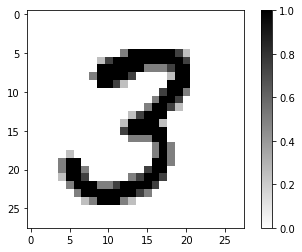

In [20]:
# Visualise an image from the training dataset as follows:
plt.figure()
plt.imshow(train_images[279],cmap='binary')
plt.colorbar()
plt.grid(False)
plt.show()

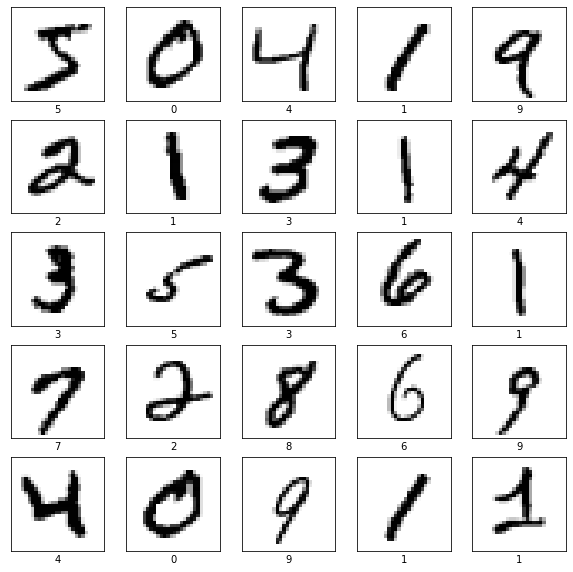

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualise an image from the training dataset as follows:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
model = tf.keras.Sequential([tf.keras.layers.Flatten( input_shape = (28,28)),
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(10)])

In [22]:
model.compile(optimizer = 'sgd',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])

In [23]:
# Feed the model and it learns from the training data:
model.fit(train_images , train_labels , epochs = 10)
 
# Evaluate Accuracy
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose = 2)
print("\n Test Accuracy :" , test_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6561 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2983 - accuracy: 0.9134
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2456 - accuracy: 0.9291
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2110 - accuracy: 0.9400
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1848 - accuracy: 0.9470
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1646 - accuracy: 0.9523
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1479 - accuracy: 0.9585
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1349 - accuracy: 0.9614
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1235 - accuracy: 0.9647
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.113

In [24]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [34]:
# Let's take a look at the first prediction:
predictions[740]

array([1.3147990e-06, 1.7007414e-04, 6.7954370e-06, 2.9389907e-04,
       7.1896076e-02, 3.7920126e-05, 8.3542386e-07, 2.5522013e-03,
       5.9434471e-05, 9.2498147e-01], dtype=float32)

In [35]:
# You can see which label has the highest confidence value:
np.argmax(predictions[740])

9

In [36]:
test_labels[740]

4

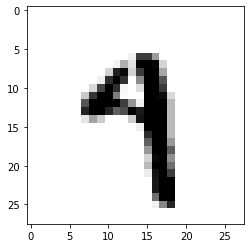

In [38]:
plt.imshow(test_images[740],cmap = plt.cm.binary)